## 乳がんのデータをロード

In [0]:
from sklearn.datasets import load_breast_cancer

# 乳がんのデータをロード
X_dataset, y_dataset = load_breast_cancer(return_X_y=True)

## データの前処理

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# X_datasetをX_trainとX_testに
# y_datasetをy_trainとy_testに分割
X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset, test_size=0.2, random_state=42)

# データを0~1の範囲にスケール
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ラベルデータをone-hot形式に変換
from tensorflow.python import keras
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

## Keras でモデル作成

In [0]:
from tensorflow.python.keras.models import Sequential

# Sequentialモデルで線形に積み重ねる
model = Sequential()

In [0]:
from tensorflow.python.keras.layers import Dense

model.add(Dense(units=4, activation='relu', input_dim=30))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='softmax'))


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

## モデルを学習

In [7]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
455/455 [==============================] - 1s 3ms/step - loss: 0.6827 - acc: 0.6462
Epoch 2/50
455/455 [==============================] - 0s 200us/step - loss: 0.6663 - acc: 0.7187
Epoch 3/50
455/455 [==============================] - 0s 190us/step - loss: 0.6455 - acc: 0.7582
Epoch 4/50
455/455 [==============================] - 0s 199us/step - loss: 0.6226 - acc: 0.7956
Epoch 5/50
455/455 [==============================] - 0s 202us/step - loss: 0.5972 - acc: 0.8154
Epoch 6/50
455/455 [==============================] - 0s 198us/step - loss: 0.5700 - acc: 0.8330
Epoch 7/50
455/455 [==============================] - 0s 228us/step - loss: 0.5436 - acc: 0.8374
Epoch 8/50
455/455 [==============================] - 0s 203us/step - loss: 0.5169 - acc: 0.8418
Epoch 9/50
455/455 [==============================] - 0s 202us/step - loss: 0.4902 - acc: 0.8615
Epoch 10/50
455/455 [==============================] - 0s 206us/step - loss: 0.4647 - acc: 0.8659
Epoch 11/50
455/455 [==========

## 正解率の算出

In [8]:
# 正解率の算出
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.1039138252013608)
('Test accuracy:', 0.9824561403508771)


## Fashion-MNIST のデータをロード

In [0]:
try:     # tensorflow v1.8 まで
  from tensorflow.python.keras._impl.keras.datasets import fashion_mnist
except:  # tensorflow v1.9 以降
  from tensorflow.python.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## データを可視化

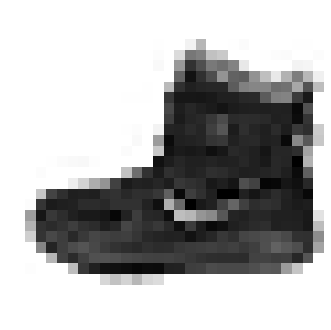

In [10]:
import matplotlib.pyplot as plt

plt.axis('off')
plt.set_cmap('gray_r')
plt.imshow(X_train[0])

## データの前処理

In [11]:
from tensorflow.python import keras
# ラベルデータをone-hotの形に変換
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# shapeを28x28画素x1チャネル（グレースケール）に変換
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 0~255の階調 から 0~1階調に変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


## CNN の作成と学習
注意：GPU無しの構成だと学習に非常に時間がかかります

In [12]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# 学習
model.fit(X_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.5232 - acc: 0.8088 - val_loss: 0.3926 - val_acc: 0.8595
Epoch 2/12
60000/60000 [==============================] - 6s 105us/step - loss: 0.3414 - acc: 0.8752 - val_loss: 0.3261 - val_acc: 0.8767
Epoch 3/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.2920 - acc: 0.8923 - val_loss: 0.3123 - val_acc: 0.8878
Epoch 4/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.2634 - acc: 0.9028 - val_loss: 0.2763 - val_acc: 0.8999
Epoch 5/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.2395 - acc: 0.9114 - val_loss: 0.2559 - val_acc: 0.9098
Epoch 6/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.2198 - acc: 0.9189 - val_loss: 0.2557 - val_acc: 0.9061
Epoch 7/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.2039 - acc: 0.9234 - val_loss: 0.2461 - 

## 正解率の算出

In [13]:
# 正解率の算出
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.24411798218488692)
('Test accuracy:', 0.9167)
